In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
df = pd.read_csv('USA_Housing.csv')

In [ ]:
df.head()

In [ ]:
df.shape

## EXPLORATORY DATA ANALYSIS

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
sns.boxplot(df['Avg. Area Income'])

In [ ]:
sns.boxplot(df['Area Population'])

In [ ]:
df.corr()

In [ ]:
plt.scatter(x =df['Avg. Area Income'], y = df['Price'] )
plt.show()

In [ ]:

plt.scatter(x =df['Avg. Area Number of Rooms'], y = df['Price'] )
plt.show()

## DATA PREPROCESSING

In [ ]:
X = df.iloc[:,[0,1,2,3,4]]
y = df['Price']

In [ ]:
X

In [ ]:
X.columns

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

In [ ]:
X_scaled

In [ ]:
X_train, X_test,y_train, y_test =train_test_split(X_scaled, y , test_size =0.2, random_state = 102 )

In [ ]:
X_test.shape

In [ ]:
y_test.shape

## BUILDING THE MODEL

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

In [ ]:
lr_model.coef_

In [ ]:
lr_model.intercept_

In [ ]:
X_test[0]

In [ ]:
lr_model.predict([X_test[0]])

In [ ]:
y_test.iloc[0]

In [ ]:
X_test

In [ ]:
predictions = lr_model.predict(X_test)

In [ ]:
lr_model.score(X_test, y_test)

In [ ]:
lr_model.score(X_train, y_train)

In [ ]:
mean_absolute_error(y_test, predictions)

In [ ]:
mean_squared_error(y_test, predictions)

In [ ]:
mean_squared_error(y_test, predictions, squared = False)

## Using Lasso Regression

In [ ]:
lasso_model = Lasso(alpha = 5.0)
lasso_model.fit(X_train, y_train)

In [ ]:
lasso_model.coef_

In [ ]:
lasso_model.intercept_

In [ ]:
predictions = lasso_model.predict(X_test)

In [ ]:
lasso_model.score(X_test, y_test)

In [ ]:
lasso_model.score(X_train, y_train)

In [ ]:
mean_squared_error(y_test, lasso_model.predict(X_test), squared = False)

In [ ]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

In [ ]:
ridge_model.coef_

In [ ]:
ridge_model.intercept_

In [ ]:
ridge_model.score(X_test, y_test)

In [ ]:
ridge_model.score(X_train, y_train)

In [ ]:
predictions = ridge_model.predict(X_test)

In [ ]:
mean_squared_error(y_test, ridge_model.predict(X_test), squared = False)

In [ ]:
X_test[6]

## NON LINEAR MODELS

In [ ]:
!pip install graphviz pydotplus

In [ ]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz
from IPython.display import Image
import pydotplus
import graphviz

In [ ]:
tree_model =DecisionTreeRegressor(max_depth = 9, random_state = 1)
tree_model.fit(X_train, y_train)

In [ ]:
mean_squared_error(y_test, tree_model.predict(X_test), squared = False)

In [ ]:
tree_model.score(X_train, y_train)

In [ ]:
tree_model.score(X_test, y_test)

In [ ]:
fig = plt.figure(figsize=(25,20))
tree_diagram=plot_tree(tree_model, max_depth = 9, 
                       feature_names = X.columns, filled = True, fontsize = 15)

In [ ]:
dot_data = export_graphviz(tree_model, max_depth = 9, 
                       feature_names = X.columns, filled = True )
# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors = 6)
knn_model.fit(X_train, y_train)

In [ ]:
knn_model.score(X_test, y_test)

In [ ]:
knn_model.score(X_train, y_train)

In [ ]:
svm_model = SVR(kernel = 'linear', C = 5.0)
svm_model.fit(X_train, y_train)

In [ ]:
svm_model.score(X_test, y_test)

In [ ]:
!pip install graphviz

In [ ]:
!pip install pydotplus

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_df = pd.read_csv(r"C:\Users\USER\Documents\TripleA\Documents folder\RAIN-PYTHON PROGRAMMING\AIML- ML Notes\ML\titanic dataset\train.csv")

In [ ]:
train_df.head(2)

In [ ]:
train_df.columns

In [ ]:
train_df.head()

In [ ]:
train_df.isnull().sum()

In [ ]:
train_df.shape

In [ ]:
df = train_df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket', 'Fare'], axis = 1)

In [ ]:
df

In [ ]:
df['Sex'].unique()

In [ ]:
df['Embarked'].unique()

In [ ]:
df['Survived'].value_counts()

In [ ]:
df["Embarked"].mode()[0]

In [ ]:
df['Age'].mean()

In [ ]:
sns.countplot(x = df['Survived'])

In [ ]:
sns.countplot(x = df['Survived'], hue =df['Sex'] )

In [ ]:
sns.countplot(x = df['Survived'], hue =df['Pclass'] )

In [ ]:
sns.countplot(x = df['Survived'], hue =df['SibSp'] )

In [ ]:
sns.countplot(x = df['Survived'], hue =df['Parch'] )

In [ ]:
df['Age'].fillna(value = int(df['Age'].mean()), inplace = True)

In [ ]:
df['Embarked'] = df['Embarked'].fillna(value = df['Embarked'].mode()[0])

In [ ]:
df.isnull().sum()

In [ ]:
df = pd.get_dummies(df, columns = ['Sex', 'Embarked'], drop_first = True)

In [ ]:
df

In [ ]:
X = df.drop('Survived', axis = 1)
y = df['Survived']

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

In [ ]:
lr_model.score(X_test, y_test)

In [ ]:
lr_model.score(X_train, y_train)

In [ ]:
tree_model = DecisionTreeClassifier(random_state = 1, max_depth = 4)
tree_model.fit(X_train, y_train)

In [ ]:
tree_model.score(X_test, y_test)

In [ ]:
tree_model.score(X_train, y_train)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 8, weights = 'distance')
knn_model.fit(X_train, y_train)

In [ ]:
knn_model.score(X_test, y_test)

In [ ]:
knn_model.score(X_train, y_train)

In [ ]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

In [ ]:
svc_model.score(X_test, y_test)

In [ ]:
svc_model.score(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(y_test, lr_model.predict(X_test), labels = lr_model.classes_)

In [ ]:
cm

In [ ]:
plot_confusion_matrix(lr_model, X_test, y_test)

In [ ]:
dist= ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = lr_model.classes_)
dist.plot()
plt.show()

In [ ]:
test_df =  pd.read_csv(r"C:\Users\USER\Documents\TripleA\Documents folder\RAIN-PYTHON PROGRAMMING\AIML- ML Notes\ML\titanic dataset\test.csv")

In [ ]:
test_df

In [ ]:
t_df = test_df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket', 'Fare'], axis = 1)
t_df

In [ ]:
t_df.isnull().sum()

In [ ]:
t_df['Age'] = t_df['Age'].fillna(29)

In [ ]:
t_df2 = pd.get_dummies(t_df, columns = ['Sex', 'Embarked'], drop_first = True)

In [ ]:
predictions = lr_model.predict(t_df2)
predictions

In [ ]:
test_df['Survived'] = predictions
test_df

In [ ]:
test_df.to_csv('submission.csv', columns = ['PassengerId', 'Survived'], index = False)

In [3]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r'C:\Users\USER\Documents\TripleA\Documents folder\RAIN-PYTHON PROGRAMMING\AIML- ML Notes\ML\titanic dataset/train.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.shape

(891, 12)

In [8]:
df2 = df.drop(['Cabin', 'Fare', 'Ticket', 'PassengerId', 'Name'], axis = 1 )

In [9]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [10]:
X = df2[['Pclass','Sex','Age','SibSp','Parch','Embarked']]
y = df2['Survived']

In [11]:
X

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,3,male,35.0,0,0,S
...,...,...,...,...,...,...
886,2,male,27.0,0,0,S
887,1,female,19.0,0,0,S
888,3,female,NaN,1,2,S
889,1,male,26.0,0,0,C


In [12]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [13]:
from sklearn.impute import KNNImputer

In [14]:
X = pd.get_dummies(X, columns = ['Sex', 'Embarked'], drop_first = True)

In [15]:
X.head()

,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,1,0,1
1,1,38.0,1,0,0,0,0
2,3,26.0,0,0,0,0,1
3,1,35.0,1,0,0,0,1
4,3,35.0,0,0,1,0,1


In [18]:
X.isnull().sum()

Pclass          0
Age           177
SibSp           0
Parch           0
Sex_male        0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [15]:
imputer = KNNImputer(weights = 'distance')
imputer.fit(X)
X_transformed = imputer.transform(X)

In [19]:
X.shape

(891, 7)

In [20]:
X_transformed

array([[ 3., 22.,  1., ...,  1.,  0.,  1.],
       [ 1., 38.,  1., ...,  0.,  0.,  0.],
       [ 3., 26.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 3., 29.,  1., ...,  0.,  0.,  1.],
       [ 1., 26.,  0., ...,  1.,  0.,  0.],
       [ 3., 32.,  0., ...,  1.,  1.,  0.]])

In [21]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test=train_test_split(X_transformed, y, test_size = 0.2,random_state = 1)

In [47]:
X_train

array([[ 3. , 26.6,  2. , ...,  1. ,  1. ,  0. ],
       [ 1. , 30. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 2. , 34. ,  0. , ...,  0. ,  0. ,  1. ],
       ...,
       [ 2. , 21. ,  0. , ...,  1. ,  0. ,  1. ],
       [ 3. , 31.6,  0. , ...,  0. ,  0. ,  1. ],
       [ 3. , 21. ,  0. , ...,  1. ,  0. ,  1. ]])

In [48]:
y_train

301    1
309    1
516    1
120    0
570    1
      ..
715    0
767    0
72     0
235    0
37     0
Name: Survived, Length: 712, dtype: int64

In [49]:
X_test

array([[ 1. , 48. ,  0. , ...,  0. ,  0. ,  1. ],
       [ 3. , 29.1,  0. , ...,  1. ,  0. ,  1. ],
       [ 2. , 17. ,  0. , ...,  0. ,  0. ,  1. ],
       ...,
       [ 3. , 42.7,  0. , ...,  1. ,  1. ,  0. ],
       [ 3. , 21. ,  0. , ...,  1. ,  1. ,  0. ],
       [ 3. ,  5. ,  2. , ...,  0. ,  0. ,  0. ]])

In [50]:
y_test

862    1
223    0
84     1
680    0
535    1
      ..
796    1
815    0
629    0
421    0
448    1
Name: Survived, Length: 179, dtype: int64

In [51]:
from sklearn.linear_model import LogisticRegression

In [60]:
lr_model  = LogisticRegression()
lr_model.fit(X_train, y_train)

C:\Users\USER\anaconda3\envs\TF\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
y_pred = lr_model.predict(X_test)

In [65]:
y_test

862    1
223    0
84     1
680    0
535    1
      ..
796    1
815    0
629    0
421    0
448    1
Name: Survived, Length: 179, dtype: int64

In [64]:
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
accuracy_score(y_test, y_pred)

0.8100558659217877

## HANDLING MISSING VALUES USING ITERARTIVE IMPUTER

In [1]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

In [16]:
X

,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,1,0,1
1,1,38.0,1,0,0,0,0
2,3,26.0,0,0,0,0,1
3,1,35.0,1,0,0,0,1
4,3,35.0,0,0,1,0,1
...,...,...,...,...,...,...,...
886,2,27.0,0,0,1,0,1
887,1,19.0,0,0,0,0,1
888,3,NaN,1,2,0,0,1
889,1,26.0,0,0,1,0,0


In [17]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [24]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
imputer = IterativeImputer( random_state = 1)

In [25]:
imputer.fit(X)
X_transformed = imputer.transform(X)

In [26]:
X_transformed

array([[ 3.        , 22.        ,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 1.        , 38.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 3.        , 26.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 3.        , 19.64565202,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        , 26.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 3.        , 32.        ,  0.        , ...,  1.        ,
         1.        ,  0.        ]])

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_transformed, y, test_size = 0.2,random_state = 1)

In [29]:
lr_model.fit(X_train,y_train)

LogisticRegression()

In [30]:
lr_model.score(X_test, y_test)

0.8044692737430168

In [31]:
X

,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,1,0,1
1,1,38.0,1,0,0,0,0
2,3,26.0,0,0,0,0,1
3,1,35.0,1,0,0,0,1
4,3,35.0,0,0,1,0,1
...,...,...,...,...,...,...,...
886,2,27.0,0,0,1,0,1
887,1,19.0,0,0,0,0,1
888,3,NaN,1,2,0,0,1
889,1,26.0,0,0,1,0,0


In [32]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.2,random_state = 1)

In [33]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [43]:
hg_model = HistGradientBoostingClassifier(max_depth = 3)
hg_model.fit(X_train, y_train)

HistGradientBoostingClassifier(max_depth=3)

In [44]:
hg_model.score(X_train,y_train)

0.8651685393258427

In [45]:
hg_model.score(X_test, y_test)

0.7821229050279329

## OUTLIER DETECTION

In [47]:
import pandas as pd
import seaborn as sns

In [48]:
df = pd.read_csv(r"C:\Users\USER\Documents\TripleA\Documents folder\RAIN-PYTHON PROGRAMMING\AIML- ML Notes\ML\diamonds.csv")

In [49]:
df.head()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,price
0,1,0.51,Premium,4,F,VS1,4,1749
1,2,2.25,Fair,1,G,I1,1,7069
2,3,0.70,Very Good,3,E,VS2,5,2757
3,4,0.47,Good,2,F,VS1,4,1243
4,5,0.30,Ideal,5,G,VVS1,7,789


In [50]:
df2 = df.drop(['Unnamed: 0', 'cut', 'color','clarity'], axis = 1)
df2.head()

,carat,cut_ord,clarity_ord,price
0,0.51,4,4,1749
1,2.25,1,1,7069
2,0.70,3,5,2757
3,0.47,2,4,1243
4,0.30,5,7,789


In [51]:
df2.isnull().sum()

carat          0
cut_ord        0
clarity_ord    0
price          0
dtype: int64

In [53]:
df2.describe()


,carat,cut_ord,clarity_ord,price
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.798597,3.903980,4.126700,3939.103500
std,0.474651,1.117043,1.665564,3995.879832
min,0.200000,1.000000,1.000000,326.000000
25%,0.400000,3.000000,3.000000,948.000000
50%,0.700000,4.000000,4.000000,2402.500000
75%,1.040000,5.000000,5.000000,5331.000000
max,5.010000,5.000000,8.000000,18823.000000


<Axes: >

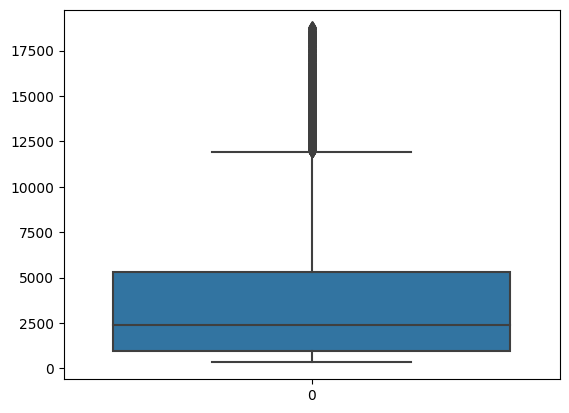

In [55]:
sns.boxplot(df2['price'])

In [56]:
X = df2[['carat','cut_ord','clarity_ord']]
y = df2['price']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 15)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [60]:
lr.score(X_test, y_test)

0.891464102482782

In [61]:
lr.score(X_train, y_train)

0.8848860920674131

In [62]:
import numpy as np

In [67]:
y = np.log(y)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 15)

<Axes: >

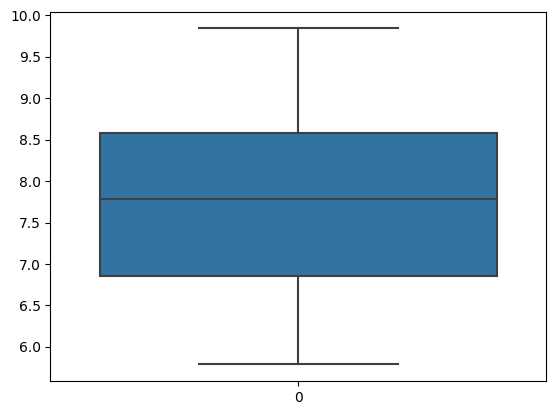

In [69]:
sns.boxplot(y)

In [70]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [71]:
lr.score(X_test, y_test)

0.862408742333191

In [72]:
lr.score(X_train, y_train)

0.8607606401680297

In [74]:
y_pred = lr.predict(X_test)

In [75]:
y_pred

array([8.10592694, 6.90669898, 7.05351938, ..., 6.66091303, 6.9942975 ,
       7.48663526])

In [76]:
np.exp(y_pred)

array([3314.05216634,  998.94425408, 1156.92323359, ...,  781.26393066,
       1090.39740475, 1784.03916195])

In [77]:
df = pd.read_csv(r"C:\Users\USER\Documents\TripleA\Documents folder\RAIN-PYTHON PROGRAMMING\AIML- ML Notes\ML\USA_Housing.csv")

In [78]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [79]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [91]:
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


<Axes: >

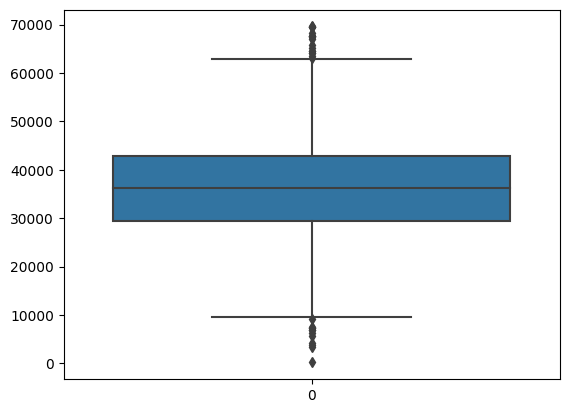

In [88]:
sns.boxplot(df['Area Population'])

In [102]:
q3 = df['Avg. Area Income'].quantile(0.75)
q1 = df['Avg. Area Income'].quantile(0.25)

iqr = q3 - q1

ll = q1 - 1.5*iqr
ul = q3 + 1.5*iqr

df.loc[df['Avg. Area Income']<ll, 'Avg. Area Income'] = ll
df.loc[df['Avg. Area Income']>ul, 'Avg. Area Income'] = ul

In [104]:
q3 = df['Avg. Area House Age'].quantile(0.75)
q1 = df['Avg. Area House Age'].quantile(0.25)

iqr = q3 - q1

ll = q1 - 1.5*iqr
ul = q3 + 1.5*iqr

df.loc[df['Avg. Area House Age']<ll, 'Avg. Area House Age'] = ll
df.loc[df['Avg. Area House Age']>ul, 'Avg. Area House Age'] = ul

In [105]:
q3 = df['Avg. Area Number of Rooms'].quantile(0.75)
q1 = df['Avg. Area Number of Rooms'].quantile(0.25)

iqr = q3 - q1

ll = q1 - 1.5*iqr
ul = q3 + 1.5*iqr

df.loc[df['Avg. Area Number of Rooms']<ll, 'Avg. Area Number of Rooms'] = ll
df.loc[df['Avg. Area Number of Rooms']>ul, 'Avg. Area Number of Rooms'] = ul

In [106]:
q3 = df['Area Population'].quantile(0.75)
q1 = df['Area Population'].quantile(0.25)

iqr = q3 - q1

ll = q1 - 1.5*iqr
ul = q3 + 1.5*iqr

df.loc[df['Area Population']<ll, 'Area Population'] = ll
df.loc[df['Area Population']>ul, 'Area Population'] = ul

In [107]:
X = df.iloc[:, :5]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 102)

In [109]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [110]:
lr_model.score(X_test, y_test)

0.9129961351571415

In [111]:
lr_model.score(X_train, y_train)

0.9180688115185945